<a href="https://colab.research.google.com/github/The237/DeepLearningCourses/blob/main/02_02_Le_vrai_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test sur le Boston dataset avec le vrai Tensorflow

In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
data = data
target = target

X = data
Y = target.reshape((506, 1))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [8]:
model = Sequential([
    Dense(units = 13, activation = "sigmoid"),
    Dense(units = 8, activation = "sigmoid"),
    Dense(units = 5, activation = "sigmoid"),
    Dense(units = 1)
  ]
)
model.compile(loss = "mse", optimizer = SGD(learning_rate = .01))

In [9]:
h = model.fit(X_train, y_train, epochs = 20, validation_data = (X_test,y_test))

Epoch 1/20
12/12 [==============================] - 1s 19ms/step - loss: 353.6419 - val_loss: 140.6895
Epoch 2/20
12/12 [==============================] - 0s 4ms/step - loss: 107.5995 - val_loss: 83.0906
Epoch 3/20
12/12 [==============================] - 0s 6ms/step - loss: 85.8816 - val_loss: 80.8578
Epoch 4/20
12/12 [==============================] - 0s 4ms/step - loss: 84.2168 - val_loss: 80.4543
Epoch 5/20
12/12 [==============================] - 0s 6ms/step - loss: 83.5354 - val_loss: 80.2210
Epoch 6/20
12/12 [==============================] - 0s 6ms/step - loss: 82.7819 - val_loss: 79.0014
Epoch 7/20
12/12 [==============================] - 0s 6ms/step - loss: 80.9430 - val_loss: 77.4689
Epoch 8/20
12/12 [==============================] - 0s 5ms/step - loss: 78.1088 - val_loss: 74.8688
Epoch 9/20
12/12 [==============================] - 0s 6ms/step - loss: 72.8278 - val_loss: 70.1581
Epoch 10/20
12/12 [==============================] - 0s 6ms/step - loss: 64.7920 - val_loss: 64.

In [12]:
h.history

{'loss': [353.6418762207031,
  107.59945678710938,
  85.88162231445312,
  84.21678924560547,
  83.53536224365234,
  82.78193664550781,
  80.94295501708984,
  78.10884094238281,
  72.82781219482422,
  64.79195404052734,
  55.16934585571289,
  46.79206085205078,
  40.32444381713867,
  35.5262565612793,
  31.354578018188477,
  28.600852966308594,
  26.434450149536133,
  24.69867515563965,
  23.616697311401367,
  22.160367965698242],
 'val_loss': [140.68948364257812,
  83.0905532836914,
  80.8577880859375,
  80.45425415039062,
  80.2209701538086,
  79.00141906738281,
  77.46891021728516,
  74.86878967285156,
  70.15807342529297,
  64.48978424072266,
  60.58578109741211,
  54.447486877441406,
  49.19499206542969,
  44.19218063354492,
  41.42960739135742,
  38.35093688964844,
  37.42095947265625,
  35.78799057006836,
  34.798431396484375,
  32.26060485839844]}

In [13]:
import matplotlib.pyplot as plt

def plot_learning_curve(history):
  plt.plot(list(range(len(history["loss"]))), history["loss"])
  plt.plot(list(range(len(history["val_loss"]))), history["val_loss"])
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title("Learning Curve")
  plt.show()

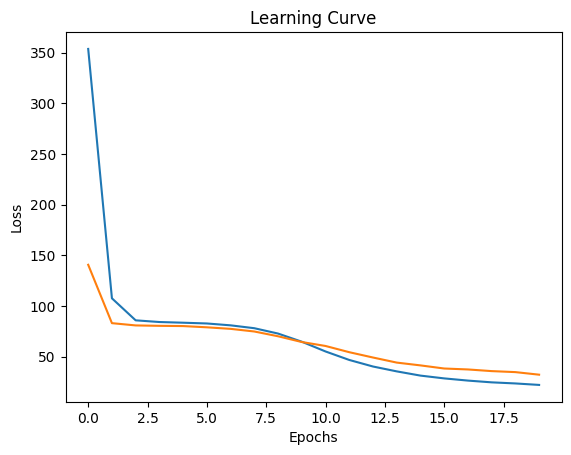

In [14]:
plot_learning_curve(h.history)

In [15]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 13)                182       
                                                                 
 dense_13 (Dense)            (None, 8)                 112       
                                                                 
 dense_14 (Dense)            (None, 5)                 45        
                                                                 
 dense_15 (Dense)            (None, 1)                 6         
                                                                 
Total params: 345 (1.35 KB)
Trainable params: 345 (1.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
from tensorflow.keras.models import load_model

In [18]:
new_model = load_model("model.h5")

In [19]:
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 13)                182       
                                                                 
 dense_13 (Dense)            (None, 8)                 112       
                                                                 
 dense_14 (Dense)            (None, 5)                 45        
                                                                 
 dense_15 (Dense)            (None, 1)                 6         
                                                                 
Total params: 345 (1.35 KB)
Trainable params: 345 (1.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
P = new_model.predict(X_test)

4/4 [==============================] - 0s 5ms/step


In [21]:
P

array([[26.092907 ],
       [21.85991  ],
       [28.294216 ],
       [13.756912 ],
       [20.05635  ],
       [19.36753  ],
       [19.55431  ],
       [20.33152  ],
       [16.913977 ],
       [18.210077 ],
       [13.180546 ],
       [14.385462 ],
       [16.678665 ],
       [13.319356 ],
       [35.000954 ],
       [31.25652  ],
       [21.181252 ],
       [33.487904 ],
       [31.800587 ],
       [21.99968  ],
       [25.494251 ],
       [20.42564  ],
       [19.177343 ],
       [28.723114 ],
       [20.10717  ],
       [13.8457365],
       [17.023323 ],
       [17.204933 ],
       [34.874428 ],
       [18.645222 ],
       [15.9917555],
       [17.507545 ],
       [19.128265 ],
       [20.547997 ],
       [29.089245 ],
       [20.427456 ],
       [13.616369 ],
       [25.484821 ],
       [15.228462 ],
       [14.790735 ],
       [23.893417 ],
       [18.528557 ],
       [22.648842 ],
       [14.847202 ],
       [25.527626 ],
       [24.09737  ],
       [17.68391  ],
       [22.72

In [22]:
new_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 32.2606


32.26060485839844

In [23]:
new_model.evaluate(X_train, y_train)

12/12 [==============================] - 0s 2ms/step - loss: 21.1281


21.128141403198242